In [1]:
# 1 Loading the data and providing an overview.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv('AmazonBooks - Sheet1.csv')
print("shape", df.shape)
print("\nColumn Headers\n", df.columns.tolist())
print("\nData Types\n", df.dtypes)

shape (600, 7)

Column Headers
 ['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']

Data Types
 Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object


In [2]:
# 1 First ten rows.
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [3]:
# Last ten rows.
df.tail(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
590,What Should Danny Do?,Adir Levy,4.8,14705,13,2020,Fiction
591,Wacky Waving Inflatable Tube Guy,Conor Riordan,4.0,25510,7,2020,Fiction
592,The Silent Patient,Alex Michaelides,4.5,61060,15,2020,Fiction
593,The Big Book of Silly Jokes for Kids,Carole P. Roman,4.7,11668,9,2020,Fiction
594,Chicka Chicka Boom Boom,Bill Martin Jr.,4.9,20705,4,2020,Fiction
595,Live Free Or Die: America (and the World) on t...,Sean Hannity,4.8,20153,15,2020,Non Fiction
596,Burn After Writing,Sharon Jones,4.6,26423,8,2020,Non Fiction
597,Get Out of Your Head: Stopping the Spiral of T...,Jennie Allen,4.7,12879,14,2020,Non Fiction
598,Human Body Activity Book for Kids: Hands-On Fu...,Katie Stokes,4.7,14128,5,2020,Non Fiction
599,Educated: A Memoir,Tara Westover,4.7,45351,11,2020,Non Fiction


# # 1 Describing what the data is:
The data above contains the top 50 bestselling novels on Amazon each year from 2009 to 2020, consisting of a total of 600 rows of bestselling books. <br> [This is a link to the dataset](https://www.kaggle.com/datasets/palanjali007/amazons-top-50-bestselling-novels-20092020?resource=download) <br> <br>
Each column is listed as such:
- Name of the novel
- Author of the novel
- Rating of novel on Amazon
- Reviews of novel on Amazon
- Price of novel on Amazon
- Year novel was bestseller
- Genre of novel (between Fiction and Non-Fiction)

# # 1 Listing out three questions you want to investigate from this dataset.
The three questions I want to figure out using this dataset are below:
- Does a higher rating of a bestseller book have a correlation to the price of a bestseller book being higher?
- Does fiction have a higher rating overall or does non-fiction?
- Did non-fiction or fiction bestsellers become more predominant over the 12 years?

In [4]:
# 2a Data Cleaning (removing features)
df = df.loc[:,['Name','User Rating','Price','Year','Genre']]
df

,Name,User Rating,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,4.7,8,2016,Non Fiction
1,11/22/63: A Novel,4.6,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,4.7,15,2018,Non Fiction
3,1984 (Signet Classics),4.7,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",4.8,12,2019,Non Fiction
...,...,...,...,...,...
595,Live Free Or Die: America (and the World) on t...,4.8,15,2020,Non Fiction
596,Burn After Writing,4.6,8,2020,Non Fiction
597,Get Out of Your Head: Stopping the Spiral of T...,4.7,14,2020,Non Fiction
598,Human Body Activity Book for Kids: Hands-On Fu...,4.7,5,2020,Non Fiction


In [5]:
# 2b Data Cleaning (address any missing values)
df.isnull().sum()

Name           0
User Rating    0
Price          0
Year           0
Genre          0
dtype: int64

In [6]:
# 2c Remove duplicates (if necessary) (This is setting up for question 1 and 2 of my three questions)
print("Shape before deduplication:",df.shape[0])
df_delduplicatesrating = df.drop_duplicates(subset='Name',keep='first')
print("Shape after deduplication:",df_delduplicatesrating.shape[0])
print("Amount of duplicates deleted:",df.shape[0]-df_delduplicatesrating.shape[0])

Shape before deduplication: 600
Shape after deduplication: 390
Amount of duplicates deleted: 210


In [7]:
# 2d Checking datatype of each column, fixing datatype if incorrect.
df_checkdatatype = df
for column in df_checkdatatype:
    print(column, df_checkdatatype[column].dtype)

Name object
User Rating float64
Price int64
Year int64
Genre object


In [8]:
# 2e Checking the 'Name' variable for any inconsistent inputs.
df_changecolumns = df_checkdatatype
print(df_changecolumns['Name'].head(50))
print("\n",df_changecolumns['Name'].value_counts(dropna=False))
print("\n","The name variable is consistent, just some books stayed on the bestselling list for multiple years")

0                         10-Day Green Smoothie Cleanse
1                                     11/22/63: A Novel
2               12 Rules for Life: An Antidote to Chaos
3                                1984 (Signet Classics)
4     5,000 Awesome Facts (About Everything!) (Natio...
5         A Dance with Dragons (A Song of Ice and Fire)
6     A Game of Thrones / A Clash of Kings / A Storm...
7                        A Gentleman in Moscow: A Novel
8         A Higher Loyalty: Truth, Lies, and Leadership
9                             A Man Called Ove: A Novel
10                            A Man Called Ove: A Novel
11    A Patriot's History of the United States: From...
12                              A Stolen Life: A Memoir
13                     A Wrinkle in Time (Time Quintet)
14    Act Like a Lady, Think Like a Man: What Men Re...
15    Adult Coloring Book Designs: Stress Relief Col...
16    Adult Coloring Book: Stress Relieving Animal D...
17       Adult Coloring Book: Stress Relieving P

In [9]:
# 2e Checking the 'Genre' variable for any inconsistent inputs.
print(df_changecolumns['Genre'].head(50))
print("\n",df_changecolumns['Genre'].value_counts(dropna=False))
print("\n","The genre variable is consistent.")

0     Non Fiction
1         Fiction
2     Non Fiction
3         Fiction
4     Non Fiction
5         Fiction
6         Fiction
7         Fiction
8     Non Fiction
9         Fiction
10        Fiction
11    Non Fiction
12    Non Fiction
13        Fiction
14    Non Fiction
15    Non Fiction
16    Non Fiction
17    Non Fiction
18    Non Fiction
19    Non Fiction
20        Fiction
21        Fiction
22        Fiction
23    Non Fiction
24        Fiction
25    Non Fiction
26    Non Fiction
27    Non Fiction
28    Non Fiction
29    Non Fiction
30    Non Fiction
31    Non Fiction
32    Non Fiction
33    Non Fiction
34    Non Fiction
35    Non Fiction
36    Non Fiction
37    Non Fiction
38        Fiction
39    Non Fiction
40        Fiction
41        Fiction
42        Fiction
43    Non Fiction
44    Non Fiction
45    Non Fiction
46        Fiction
47        Fiction
48        Fiction
49    Non Fiction
Name: Genre, dtype: object

 Non Fiction    337
Fiction        263
Name: Genre, dtype: int64

 The g

<AxesSubplot:>

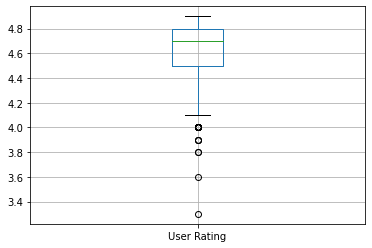

In [10]:
# 2f Checking column 'User Rating' for any outliers (no deleted duplicates)
df_nooutlier = df_changecolumns
df_nooutlier.boxplot(column=['User Rating'])

<AxesSubplot:>

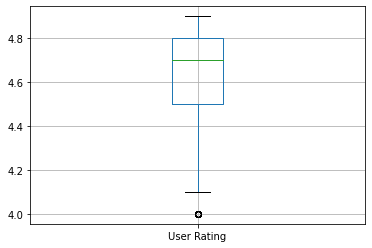

In [11]:
# 2f Removing outliers from User Rating (Below 4.0) (no deleted duplicates)
df_nooutlier = df_changecolumns.loc[df_changecolumns['User Rating'] >= 4.0]  
df_nooutlier.boxplot(column=['User Rating'])

<AxesSubplot:>

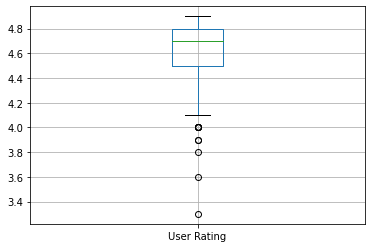

In [12]:
# 2f Checking column 'User Rating' for any outliers (deleted duplicates)
df_nooutliernorduplicates = df_delduplicatesrating
df_nooutliernorduplicates.boxplot(column=['User Rating'])

<AxesSubplot:>

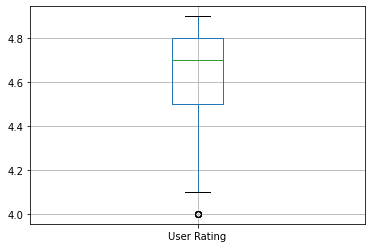

In [13]:
# 2f Removing outliers from User Rating (Below 4.0) (deleted duplicates)
df_nooutliernorduplicates = df_nooutliernorduplicates.loc[df_nooutliernorduplicates['User Rating'] >= 4.0]  
df_nooutliernorduplicates.boxplot(column=['User Rating'])

<AxesSubplot:>

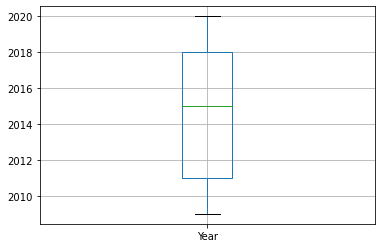

In [14]:
# 2f Checking column 'Year' for any outliers
df_nooutlier.boxplot(column=['Year'])

<AxesSubplot:>

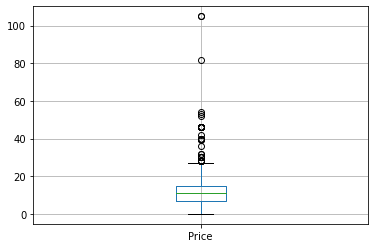

In [15]:
# 2f Checking column 'Price' for any outliers (no deleted duplicates)
df_nooutlier.boxplot(column=['Price'])

<AxesSubplot:>

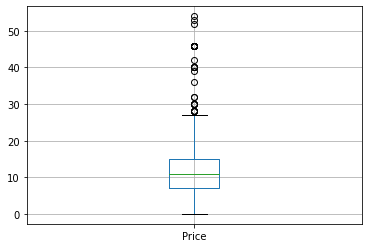

In [16]:
# 2f Removing outliers from Price (Anything above 60) (no deleted duplicates)
df_nooutlier = df_nooutlier[df_nooutlier['Price'] <= 60]  
df_nooutlier.boxplot(column=['Price'])

<AxesSubplot:>

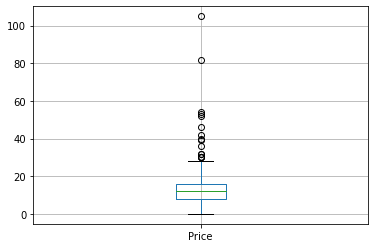

In [17]:
# 2f Checking column 'Price' for any outliers (deleted duplicates)
df_nooutliernorduplicates.boxplot(column=['Price'])

<AxesSubplot:>

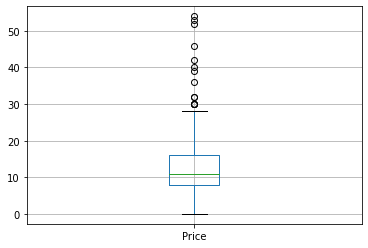

In [18]:
# 2f Removing outliers from Price (Anything above 60) (no deleted duplicates)
df_nooutliernorduplicates = df_nooutliernorduplicates[df_nooutliernorduplicates['Price'] <= 60]  
df_nooutliernorduplicates.boxplot(column=['Price'])

<function matplotlib.pyplot.show(close=None, block=None)>

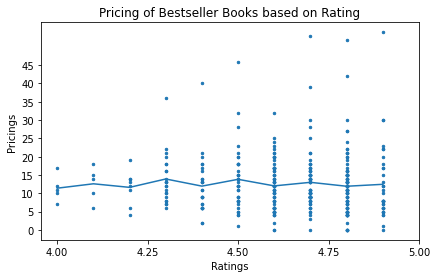

In [19]:
# 3 Question A: Does a higher rating of a bestseller book have a correlation to the price of a bestseller book being higher?
dfcomparison = df_nooutliernorduplicates.loc[:,['User Rating','Price']]
sum = 4
mean = 0
dfcomparisonrating = pd.DataFrame(columns=['User Rating','Price'])
for i in range(0,10):
    averageprice = dfcomparison['Price'][dfcomparison['User Rating']==sum].mean()
    dfcomparisonrating.loc[len(dfcomparisonrating.index)] = [sum, averageprice]
    sum = round(sum + 0.1,1)
    dfcomparisonrating = dfcomparisonrating.dropna()
plt.plot(dfcomparisonrating.iloc[:,0],dfcomparisonrating.iloc[:,1])
plt.scatter(dfcomparison.iloc[:, 0],dfcomparison.iloc[:, 1], s=6)
plt.title('Pricing of Bestseller Books based on Rating')
plt.xlabel('Ratings')
plt.ylabel('Pricings')
plt.yticks(np.arange(0,50,5))
plt.xticks(np.arange(4.0,5.25,0.25))
plt.subplots_adjust(right=1.0)
plt.show


In [20]:
# 3 Question A: Showing dataframe for easier describing of data and graph.
dfcomparisonrating

,User Rating,Price
0,4.0,11.400000
1,4.1,12.600000
2,4.2,11.625000
3,4.3,13.913043
4,4.4,11.962963
5,4.5,13.820513
6,4.6,12.027778
7,4.7,13.000000
8,4.8,11.927835
9,4.9,12.457143


# Question A Graph Interpretation -
The scatterplot shows the price of bestselling books (from 2009 to 2020) compared to the bestselling books ratings. A line graph is also on the same plot, indicating the average price for each iteration of User Rating. Overall, there is little to none increase in price over an increase in rating, and there is also little to none decrease in price over a decrease in rating. An example being that the average price only fluctuates from ```$11.40``` minimum to ```$13.91``` maximum, a ```$2.51```difference. Furthermore, the rating at ```$13.91``` is actually a rating of 4.3, while a rating of 4.9 only has an average price of ```$12.46```. This only slight amount of difference indicates a weak, slightly positive, non-linear relationship. The rating of a bestselling book does not strongly correlate to the pricing of a bestselling book. <br> <br> To conclude, the graph shows a non-linear, weak relationship between the prices and ratings of these bestselling books, and a majority of books spread across these ratings are priced at around the same amounts, fluctuating at a minor difference.

<function matplotlib.pyplot.show(close=None, block=None)>

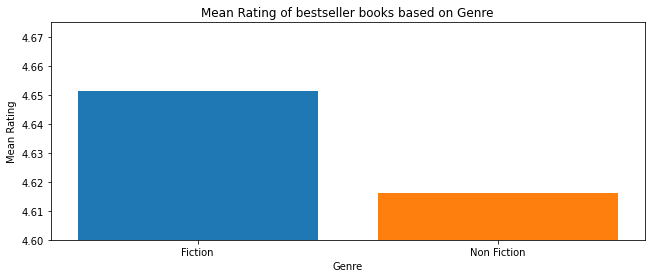

In [21]:
# 3 Question B: Does fiction have a higher rating on average or does non-fiction? How many bestselling books are fiction, and how many are non-fiction?
dfcomparison = df_nooutliernorduplicates.loc[:, ['Genre','User Rating']]
df_nonfiction = dfcomparison.loc[dfcomparison['Genre']=='Non Fiction']
df_fiction = dfcomparison.loc[dfcomparison['Genre']=='Fiction']
plt.bar(df_fiction.iloc[:,0],df_fiction.iloc[:,1].mean())
plt.bar(df_nonfiction.iloc[:,0],df_nonfiction.iloc[:,1].mean())
plt.title('Mean Rating of bestseller books based on Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.ylim(4.6,4.675)
plt.subplots_adjust(right=1.5)
plt.show

Text(0, 0.5, 'Amount of Books')

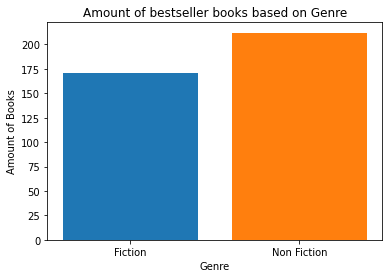

In [22]:
plt.bar(df_fiction.iloc[:,0],df_fiction['Genre'].iloc[:].value_counts())
plt.bar(df_nonfiction.iloc[:,0],df_nonfiction['Genre'].iloc[:].value_counts())
plt.title('Amount of bestseller books based on Genre')
plt.xlabel('Genre')
plt.ylabel('Amount of Books')

# Question B Graph Interpretations -
The first bar plot shows the genres (Fiction and Non Fiction) of bestselling books (from 2009 to 2020) and their respective mean ratings (excluding outliers which are below 4.0 rating). The second bar plot shows the count of how many unique books there are in both genres. Overall, for the first bar plot, there is a higher rating on average for Fiction versus Non-Fiction. Fiction has a mean rating of 4.651, and Non Fiction has a mean rating of 4.617, making a difference of 0.034. For the second bar plot, there are more Non Fiction bestselling books than Fiction bestselling books. Fiction books are amounted to 171 and Non Fiction books at 212, making a difference of 41 books. There are 41% more Non Fiction books than Fiction books on the bestselling list from 2009 to 2020. <br> <br> To conclude, Fiction has less bestselling books than Non Fiction, but a higher mean rating, while Non Fiction has more bestselling books, but a lower mean rating.

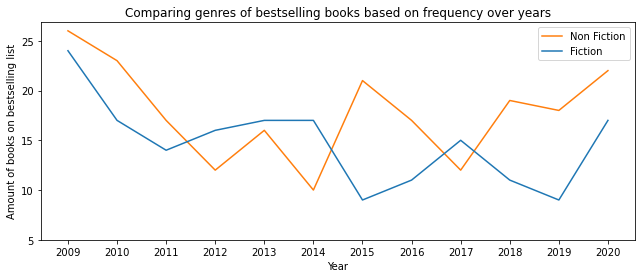

In [23]:
# 3 Question C: Were non-fiction or fiction bestsellers more predominant over the 12 years?
dfcomparison = df_delduplicatesrating.loc[:, ['Year','Genre']]
df_nonfiction = dfcomparison.loc[dfcomparison['Genre']=='Non Fiction']
df_fiction = dfcomparison.loc[dfcomparison['Genre']=='Fiction']
df_nonfiction.value_counts(sort=False).plot.line(color=['tab:orange'])
df_fiction.value_counts(sort=False).plot.line(color=['tab:blue'])
plt.xlabel('Year')
plt.ylabel('Amount of books on bestselling list')
plt.title('Comparing genres of bestselling books based on frequency over years')
plt.legend(['Non Fiction','Fiction'])
plt.subplots_adjust(right=1.5)
plt.yticks(np.arange(5,30,5))
labels=[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
plt.xticks(np.arange(0,12,1), labels)
plt.show()

In [24]:
# 3 Question C: Showing dataframe for easier describing of data and graph.
print("\nFiction:",df_fiction.value_counts(sort=False))
print("\nNon Fiction:",df_nonfiction.value_counts(sort=False))


Fiction: Year  Genre  
2009  Fiction    24
2010  Fiction    17
2011  Fiction    14
2012  Fiction    16
2013  Fiction    17
2014  Fiction    17
2015  Fiction     9
2016  Fiction    11
2017  Fiction    15
2018  Fiction    11
2019  Fiction     9
2020  Fiction    17
dtype: int64

Non Fiction: Year  Genre      
2009  Non Fiction    26
2010  Non Fiction    23
2011  Non Fiction    17
2012  Non Fiction    12
2013  Non Fiction    16
2014  Non Fiction    10
2015  Non Fiction    21
2016  Non Fiction    17
2017  Non Fiction    12
2018  Non Fiction    19
2019  Non Fiction    18
2020  Non Fiction    22
dtype: int64


# Question C Graph Interpretation -
The two line graphs in orange and blue respectively represent Non Fiction and Fiction bestselling books. The line graph goes over the count of each genre for each year from 2009 to 2020. Overall, Fictcion and Non Fiction both fluctuated over the years, but ultimately each lowered their count from the beginning in 2009, with Fiction dropping down from 24 to 17 books, and Non Fiction dropping down from 26 to 22 books. Fiction had a lower frequency of books over the years, with Non Fiction have a higher amount for almost every year. In 2012, Fiction books had four more books than Non Fiction books, 16 versus 12, and this trend continued up until 2015, in which Fiction dropped down from 17 to 9 books and Non Fiction rose from 10 to 21. The trend of Non Fiction outranking Fiction continued with the exception of 2017, in which Fiction had 3 more books than Non Fiction, 15 versus 12. <br> <br> To conclude: The two line graphs show Non Fiction in orange and Fiction in blue for bestselling books over twelve years. Non Fiction was more predominant than Fiction throughout, with a few exceptions from 2012-2014 and 2017. Both Fiction and Non Fiction had fluctuating counts of books, but both ended with a lower amount of books than what they started at.

# Summary -
# The main findings I found from the project are listed below as followed:
- The amount of non-fiction bestseller books compared to fiction bestseller books from 2009 to 2020.
- How many non-fiction bestsellers and fiction bestsellers there are from 2009 to 2020.
- How bestselling fiction books ratings and bestselling non-fiction books ratings compare to each other.
- User Rating and Price have little to no correlation. <br>
# What I failed to find:
- What actually correlates with Price, there may be little correlation to any of the columns.
- Why did Fiction have more popularity from 2012-2014 and in 2017?
- Why did Non Fiction have more bestseller books overall?
- Does the mean rating from each genre indicate a popularity preference?
- Why are most prices around ```$10``` to ```$30```? <br>
# What I want to further explore about the topic:
- With duplicates, my previous questions.
- How many bestselling books get replaced every year?
- Do reviews relate to rating?
- What titles and/or authors get the best ratings?

[This is a link to the project on GitHub](https://github.com/JackHCOMP/COMP3800Project1)